<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/bike_sales_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, This is a self project done on Google Colab on bike sales data. The data is taken from the Freecodecamp excersise. Below analysis is done using Python and librabries used are numpy, pandas and matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/MaliniVibin1502/python/main/bike_sales.csv'
bike = pd.read_csv(url, parse_dates=['Date'])
bike.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Data Cleaning

In [2]:
bike.shape

(113036, 18)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

Mean for customers age in the bike sales data dataset. Plotting the Density (KDE) and a box plot with the Customer_Age data to understand the dataset.

In [ ]:
bike['Customer_Age'].mean()

35.91921157861212

<Axes: ylabel='Density'>

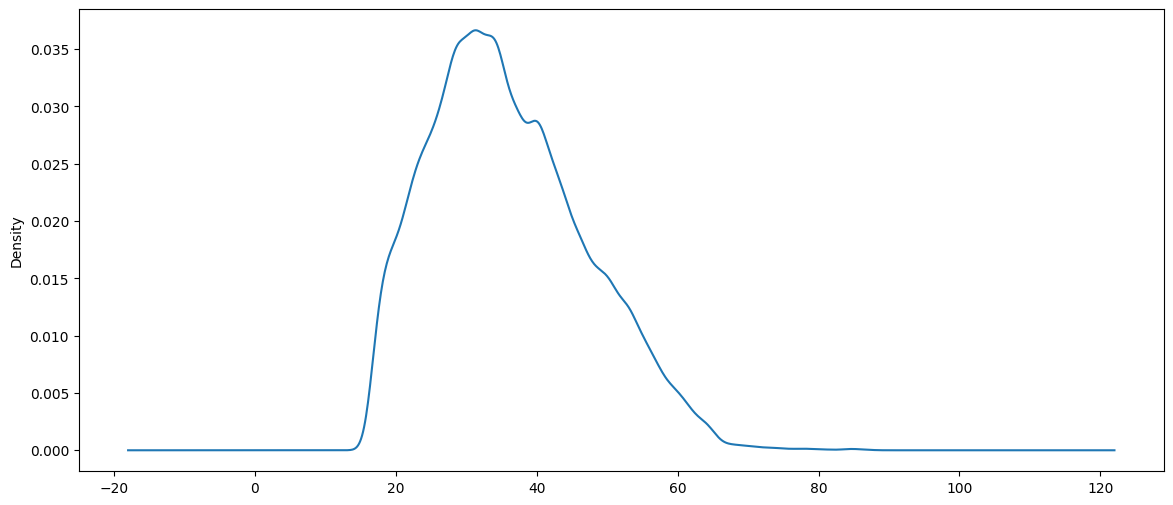

In [ ]:
bike['Customer_Age'].plot(kind= 'kde', figsize = (14,6))

<Axes: >

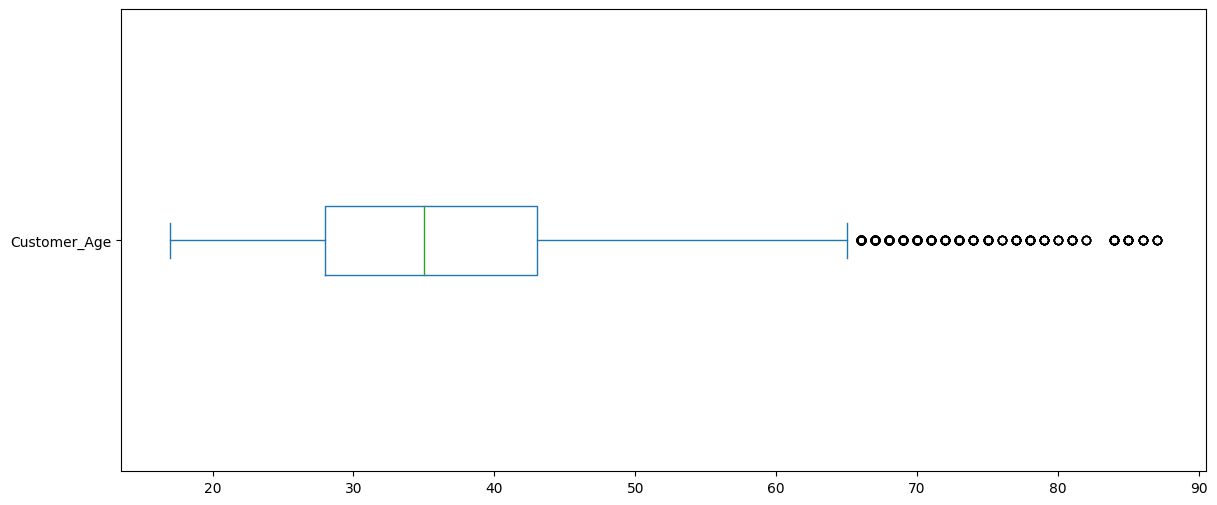

In [ ]:
bike['Customer_Age'].plot(kind= 'box', vert =False, figsize=(14,6))

Mean of the column Order_Quanity and plotting a Histogram and Box plot

In [ ]:
bike['Order_Quantity'].mean()

11.901659648253654

<Axes: ylabel='Frequency'>

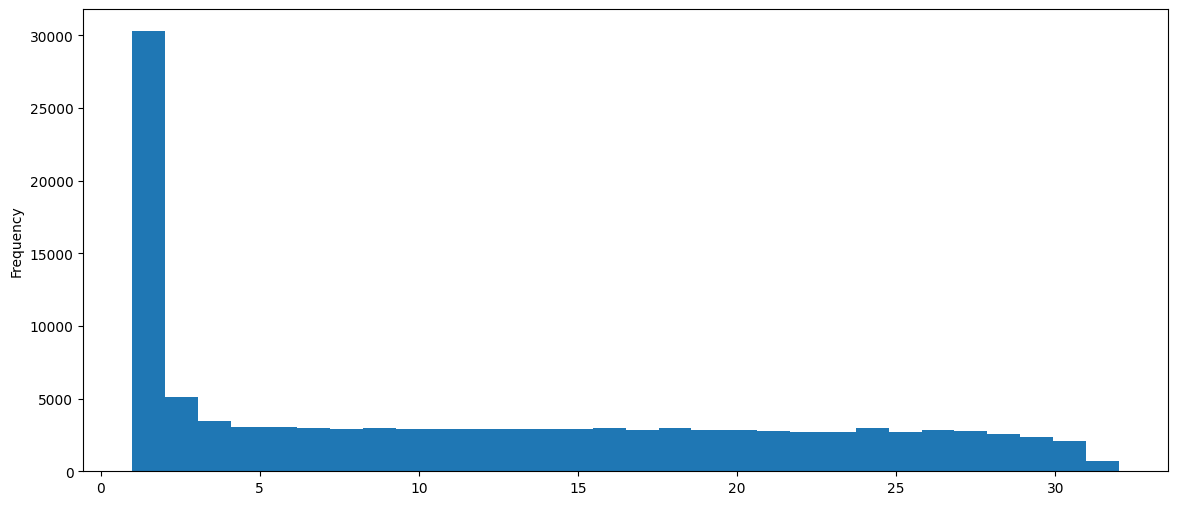

In [ ]:
bike['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

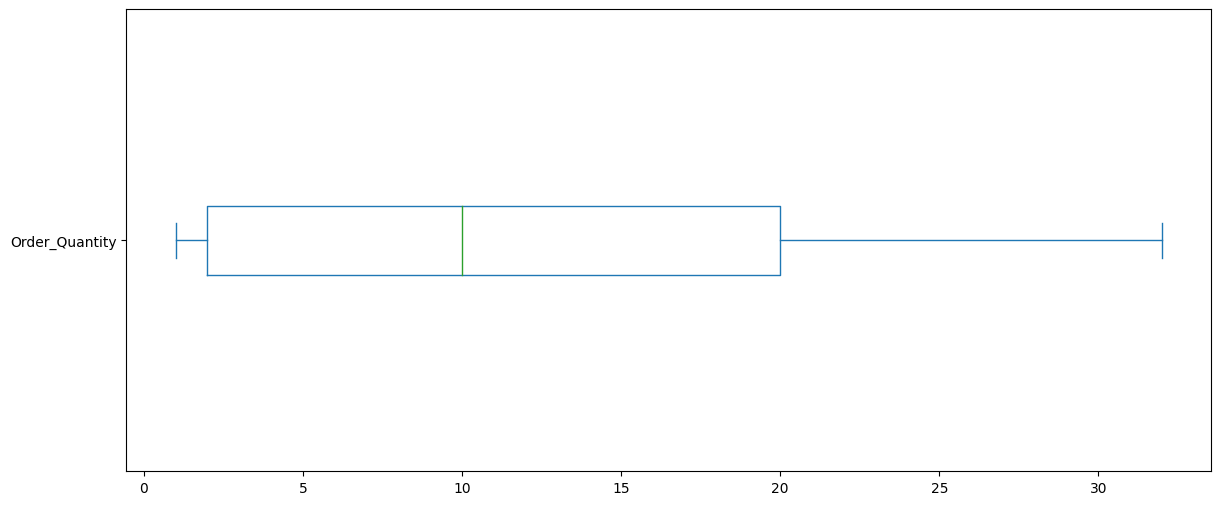

In [ ]:
bike['Order_Quantity'].plot(kind ='box', vert=False, figsize=(14,6))

Analysing the sales per year and month. Plotting a pie chart to understand the sales on a per year basis. Plotting a bar chat to understand the sales on aper month basis.

<Axes: ylabel='Year'>

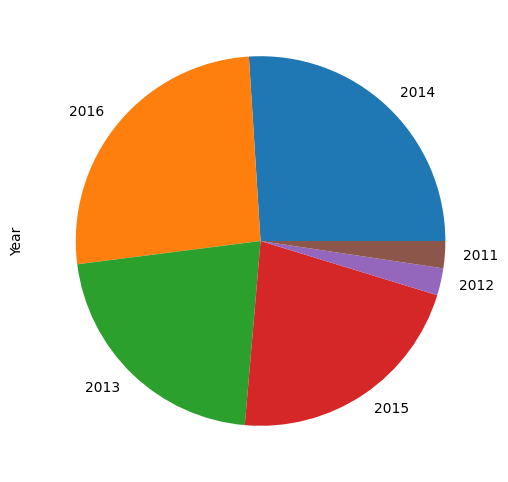

In [ ]:
bike['Year'].value_counts()
bike['Year'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: >

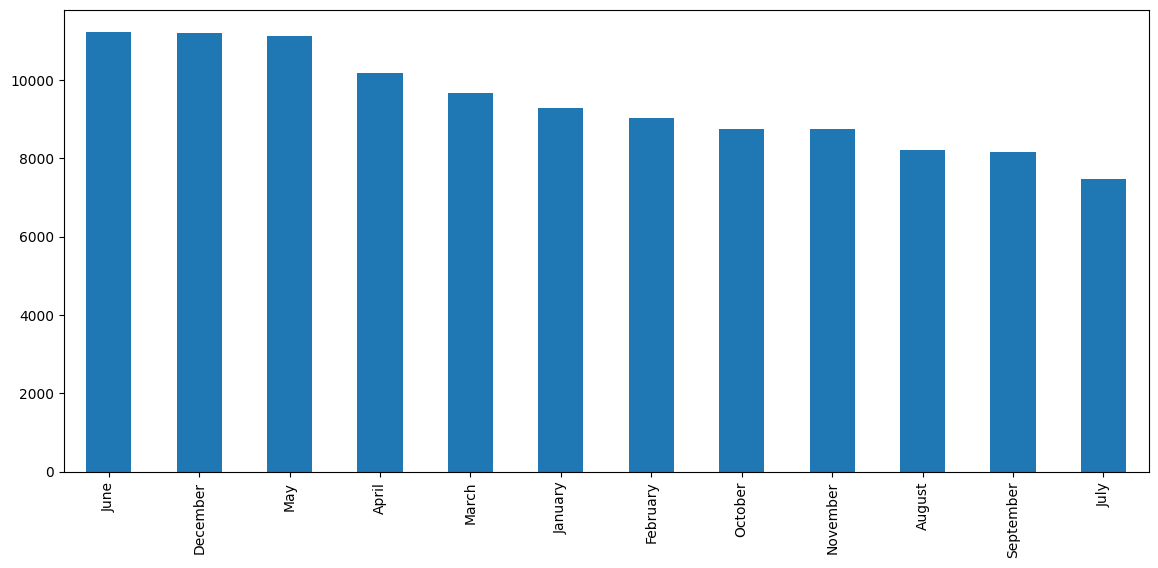

In [ ]:
bike['Month'].value_counts()
bike['Month'].value_counts().plot(kind='bar', figsize=(14,6))

Finding the country with the maximum sales and plotting a pie chart to understand the sales by country

<Axes: ylabel='Country'>

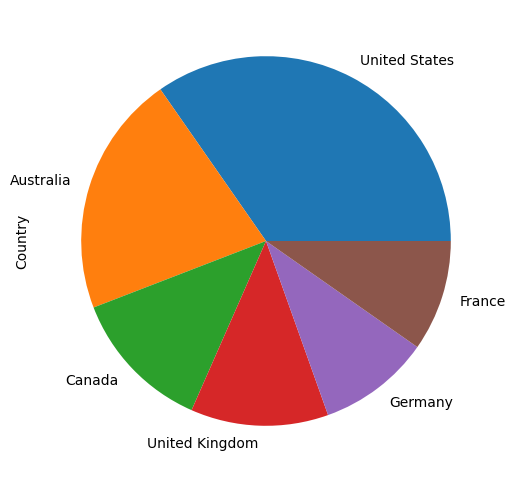

In [ ]:
bike['Country'].value_counts()
bike['Country'].value_counts().plot(kind='pie', figsize=(6,6))

List of all products sold and plotting a bar chart with the 10 most sold products

<Axes: >

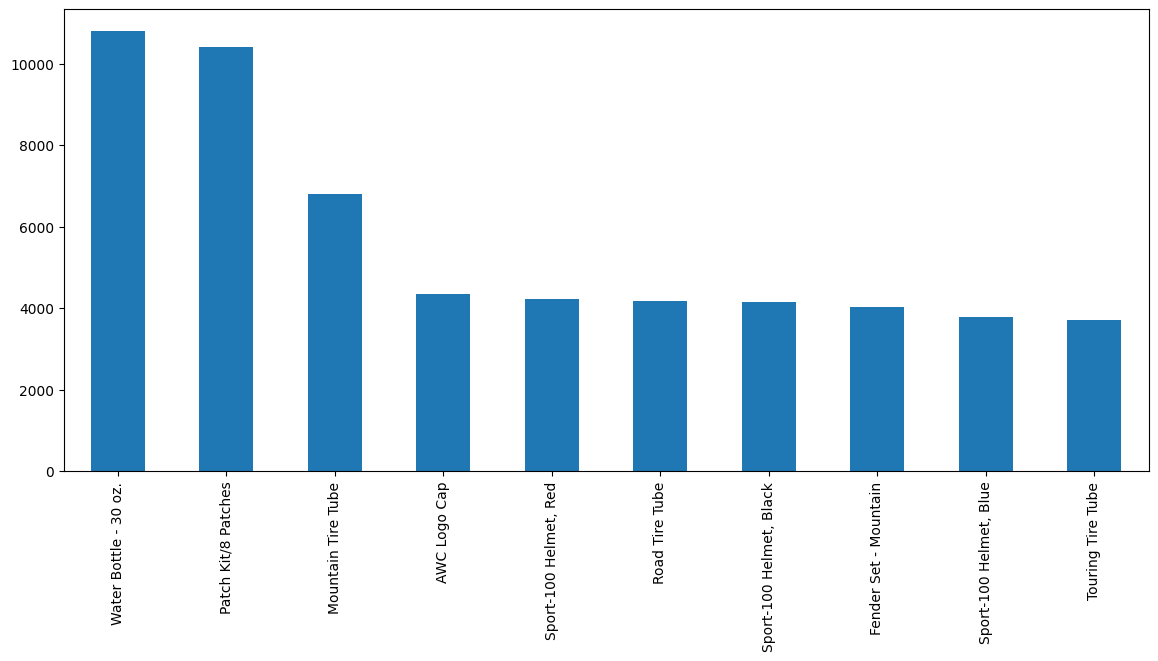

In [ ]:
bike['Product'].unique
bike['Product'].value_counts()
bike['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

Analysing the relationship between the following using scatter plot
- Unit cost of the products and Unit Price
- Order quantity and profit

Analysing the relationship between the following using box plot
- Profit per country
- Customer age per country

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

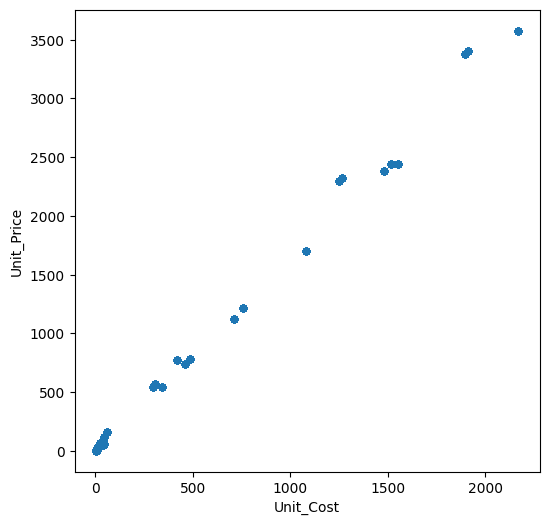

In [ ]:
bike.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize= (6,6))

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

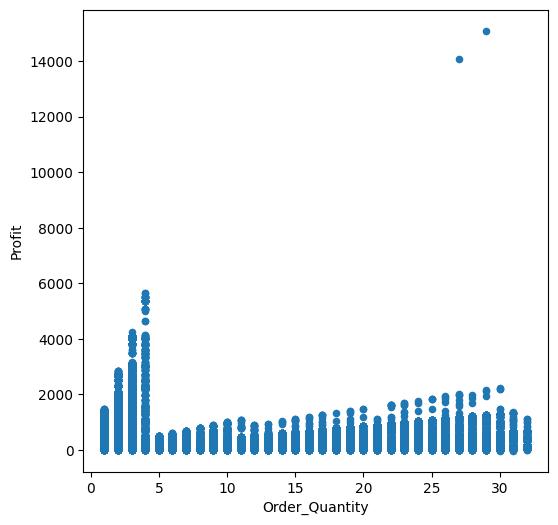

In [ ]:
bike.plot(kind = 'scatter', x='Order_Quantity', y = 'Profit' , figsize=(6,6))

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

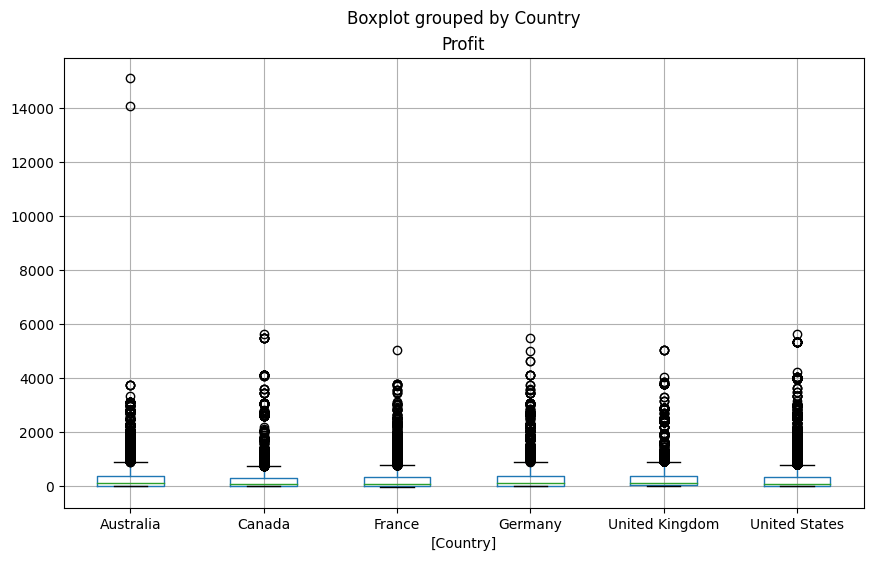

In [ ]:
bike[['Profit','Country']].boxplot(by ='Country', figsize=(10,6))

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

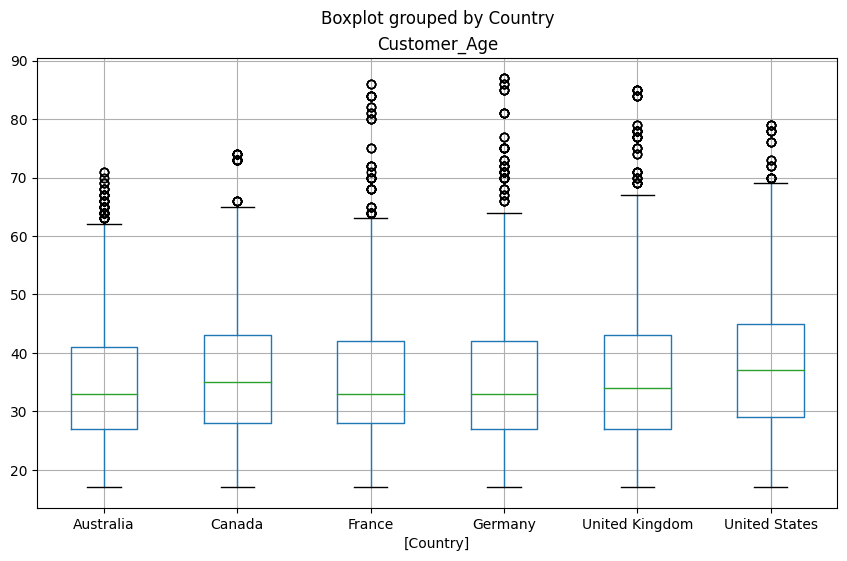

In [ ]:
bike[['Customer_Age','Country']].boxplot(by = 'Country', figsize=(10,6))

To analyse how the sales evolved through the years a new column has to be calculated using the columns Year, Month and Day. Once created that column can be used to draw a line chart.

<Axes: >

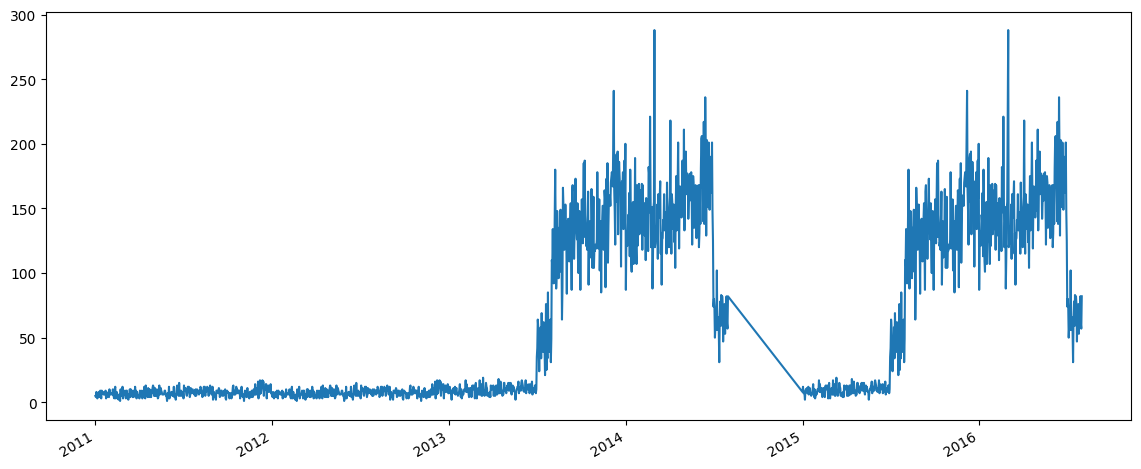

In [ ]:
bike['Calculated_Date'] = bike[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
bike['Calculated_Date']= pd.to_datetime(bike['Calculated_Date'])
bike['Calculated_Date'].head()
bike['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))



Number of Orders made in Canada and France

In [ ]:
bike.loc[(bike['Country']== 'Canada')| (bike['Country']=='France')].shape[0]

25176

Number of Bike Racks ordered from Canada

In [ ]:
bike.loc[(bike['Country']=='Canada') & (bike['Sub_Category']=='Bike Racks')].shape[0]

104

Bar chart of orders made in each region of country France

In [ ]:
orders_region = bike.loc[bike['Country']=='France', 'State']
orders_region


50        Seine Saint Denis
51        Seine Saint Denis
52                  Moselle
53                  Moselle
60                     Nord
                ...        
112979              Essonne
113000              Essonne
113001              Essonne
113034        Seine (Paris)
113035        Seine (Paris)
Name: State, Length: 10998, dtype: object

<Axes: >

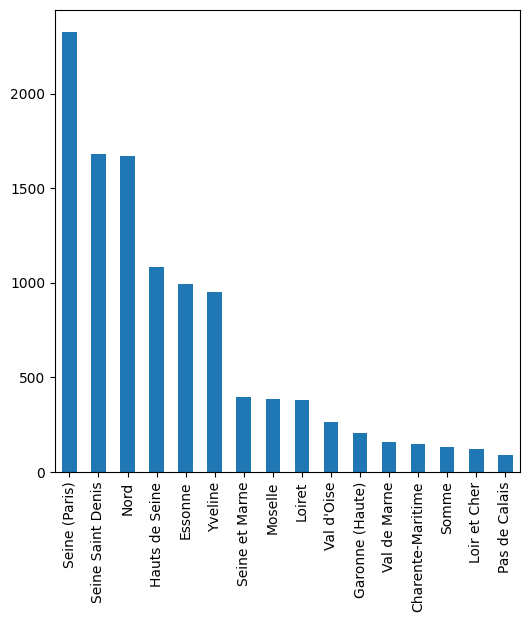

In [ ]:
orders_region.value_counts().plot(kind='bar',figsize=(6,6))

Pie plot of sales made per category

In [ ]:
sales_category = bike['Product_Category'].value_counts()
sales_category


Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<Axes: ylabel='Product_Category'>

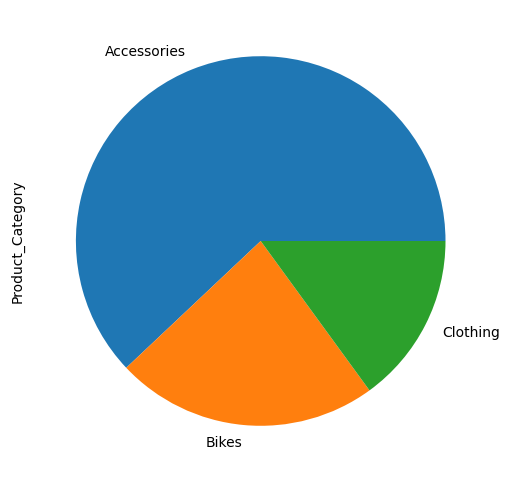

In [ ]:
sales_category.plot(kind='pie',figsize=(6,6))

Bar plot of orders made per Accessory sub_category

In [ ]:
orders_sub = bike.loc[bike['Product_Category']=='Accessories','Sub_Category']
orders_sub.value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<Axes: >

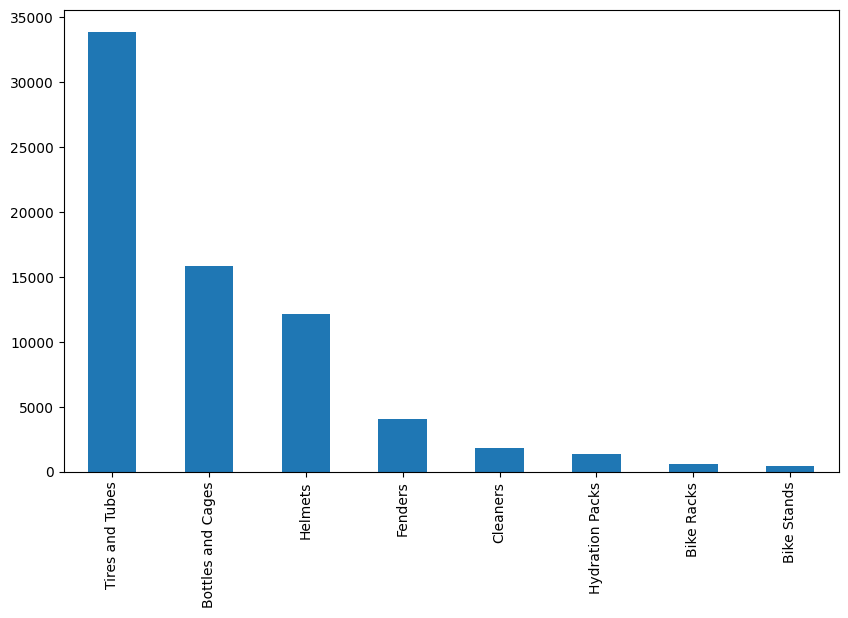

In [ ]:
orders_sub.value_counts().plot(kind='bar',figsize=(10,6))

Pie plot of orders were made per bike sub-categories

In [ ]:
bike_category = bike.loc[bike['Product_Category']=='Bikes', 'Sub_Category'].value_counts()
bike_category

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<Axes: ylabel='Sub_Category'>

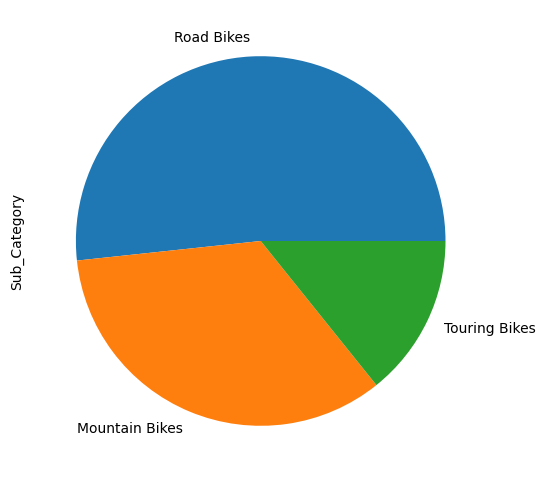

In [ ]:
bike_category.value_counts().plot(kind='pie',figsize=(6,6))

In [ ]:
bike['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<Axes: ylabel='Customer_Gender'>

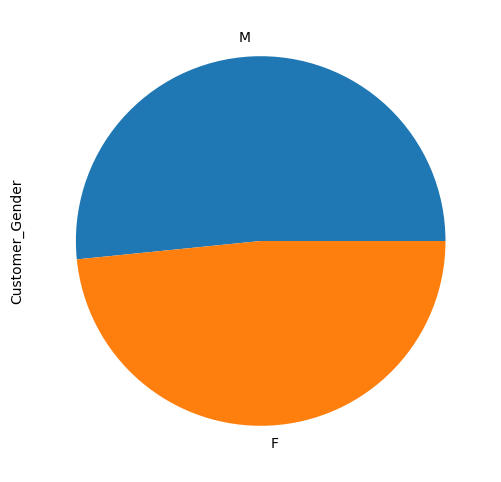

In [ ]:
bike['Customer_Gender'].value_counts().plot(kind='pie', figsize=(6,6))

Sales with more than 500 in Revenue were made by men

In [ ]:
bike.loc[(bike['Customer_Gender'] == 'M') & (bike['Revenue'] > 500)].shape[0]


21773

Top-5 sales with the highest revenue

In [ ]:
bike.sort_values(['Revenue'], ascending=False).head(5)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169


Sale with the highest revenue

In [ ]:
highest_sales= bike['Revenue'] == bike['Revenue'].max()
bike.loc[highest_sales]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


Mean of Order_Quantity of orders with more than 10K in revenue & Mean Order_Quantity of orders with less than 10K in revenue

In [ ]:
more = bike['Revenue'] >= 10000
bike.loc[more, 'Order_Quantity'].mean()

3.7218934911242605

In [ ]:
less = bike['Revenue'] <= 10000
bike.loc[less, 'Order_Quantity'].mean()

11.913907519469818

Orders made in May of 2016

In [ ]:
order_may= (bike['Year']== 2016) & (bike['Month']== 'May')
bike.loc[order_may].shape[0]


5015

Orders made between May and July of 2016

In [ ]:
order_bt= (bike['Year']== 2016) & (bike['Month'].isin(['May', 'June', 'July']))
bike.loc[order_bt].shape[0]

12164

Box plot per month with the profit values for the year 2016

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

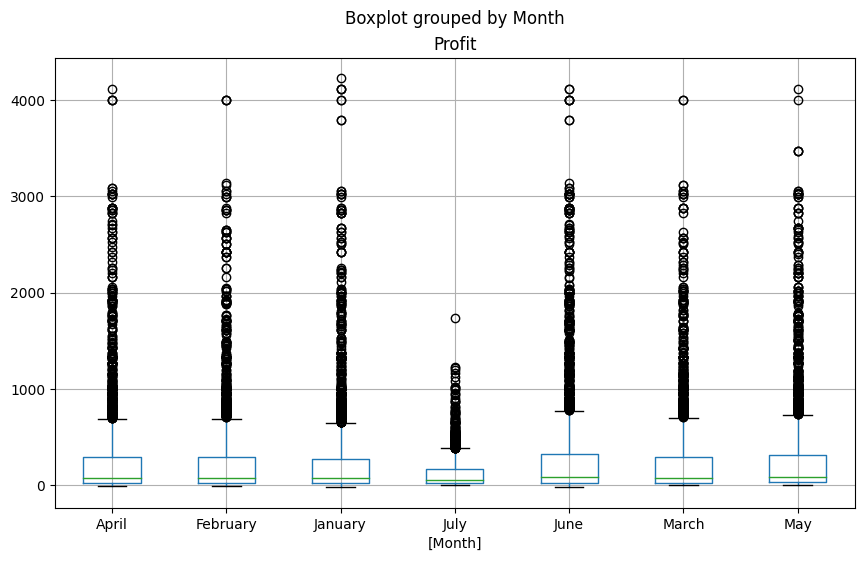

In [ ]:
profit_2016 = bike.loc[bike['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(10,6))

Add 7.2% TAX on every sale Unit_Price within United States

In [ ]:
bike.loc[bike['Country'] == 'United States']

In [ ]:
bike.loc[bike['Country'] == 'United States', 'Unit_Price']*= 1.072
bike.loc[bike['Country'] == 'United States']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
22,2014-03-27,27,March,2014,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,137.902080,524,405,929
23,2016-03-27,27,March,2016,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,137.902080,407,315,722
34,2013-07-19,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,137.902080,524,405,929
35,2015-07-19,19,July,2015,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,137.902080,524,405,929
38,2013-07-13,13,July,2013,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,137.902080,726,450,1176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113021,2015-10-02,2,October,2015,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",24,24,73.547776,929,576,1505
113022,2014-03-20,20,March,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",28,24,73.547776,1084,672,1756
113023,2016-03-20,20,March,2016,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",26,24,73.547776,1007,624,1631
113024,2014-04-03,3,April,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",16,24,73.547776,620,384,1004
